### 1. Import libraries and packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic


### 2. Importing data and setting up file accessing path

In [2]:

def read_folder(folder_path):
    dataframes = {}
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            file_name_no_ext, file_extension = os.path.splitext(file_name)
            if file_extension == '.csv':
                df = pd.read_csv(file_path)
            elif file_extension in ['.xls', '.xlsx']:
                df = pd.read_excel(file_path)
            else:
                continue # ignore files with unsupported extensions
            dataframes[file_name_no_ext] = df
    return dataframes


In [3]:
folder_path = '/Users/unmeshgupta/Desktop/QE'
dataframes = read_folder(folder_path)

csv_files = [f for f in os.listdir(folder_path) if f.endswith(('.xlsx','.csv'))]
csv_files

['WuXiaShadowRate.xlsx',
 'DFF.csv',
 'INDPRO.csv',
 'WSHOSHO.csv',
 'CPIAUCSL.csv']

In [4]:
# DATAFRAMEs representing 

dff = dataframes['DFF']
ipi = dataframes['INDPRO']
sho = dataframes['WSHOSHO']
cpi = dataframes['CPIAUCSL']
shadow_rate = dataframes['WuXiaShadowRate']

print(dff.columns)
print(ipi.columns)
print(sho.columns)
print(cpi.columns)
print(shadow_rate.columns)


Index(['DATE', 'DFF'], dtype='object')
Index(['DATE', 'INDPRO'], dtype='object')
Index(['DATE', 'WSHOSHO'], dtype='object')
Index(['DATE', 'CPIAUCSL'], dtype='object')
Index(['date',
       'Effective federal funds rate (% p.a.), last business day of month',
       'Wu-Xia shadow federal funds rate (last business day of month)'],
      dtype='object')


In [5]:
shadow_rate

,date,"Effective federal funds rate (% p.a.), last business day of month",Wu-Xia shadow federal funds rate (last business day of month)
0,1960-01-01,4.00,NaN
1,1960-02-01,4.00,NaN
2,1960-03-01,4.00,NaN
3,1960-04-01,4.00,NaN
4,1960-05-01,3.50,NaN
...,...,...,...
741,2021-10-01,0.07,-1.702101
742,2021-11-01,0.07,-1.849795
743,2021-12-01,0.07,-1.154819
744,2022-01-01,0.08,-0.197425


In [ ]:
sho

In [6]:
print(dff.info())
print(ipi.info())
print(sho.info())
print(cpi.info())
print(shadow_rate.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5845 entries, 0 to 5844
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    5845 non-null   object 
 1   DFF     5845 non-null   float64
dtypes: float64(1), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    193 non-null    object 
 1   INDPRO  193 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     835 non-null    object 
 1   WSHOSHO  835 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 

### 3. Pre-Processing 

In [7]:
# Wu-Xia shadow federal funds rate column names are irregular, renaming convention in line with literature review 

column_names = {
    'Effective federal funds rate (% p.a.), last business day of month': 'ffr',
    'Wu-Xia shadow federal funds rate (last business day of month)': 'shadow_rate'
}

# use the rename method to rename the columns and let go of null values in shadow, our point of interest in this analysis
shadow_rate = dataframes['WuXiaShadowRate']
shadow_rate = shadow_rate.rename(columns=column_names)
shadow_rate = shadow_rate[shadow_rate['shadow_rate'].notna()]
shadow_rate = shadow_rate.drop(['ffr'], axis=1)



# changing DATE columns for dff,ipi,sho,cpi to datetime for date parsing later 

def pre_process(df):
    
    df = df.rename(columns={'DATE': 'date'})
    df['date'] = pd.to_datetime(df['date'])
    return df

 
dff = pre_process(dff)
ipi = pre_process(ipi)
sho = pre_process(sho)
cpi = pre_process(cpi)


In [8]:
def plot_lineplot(df):
    df_melt = pd.melt(df, id_vars='date', var_name='interest', value_name='value')
    sns.set(style='ticks', palette='dark', rc={'lines.linestyle': '--'})
    return sns.lineplot(x='date', y='value', hue='interest', ci='sd', data=df_melt, marker='o', markersize=3, linewidth=2, alpha=0.8)


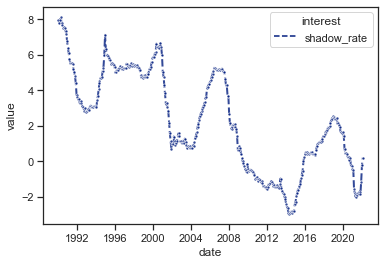

In [9]:
plot_lineplot(shadow_rate)

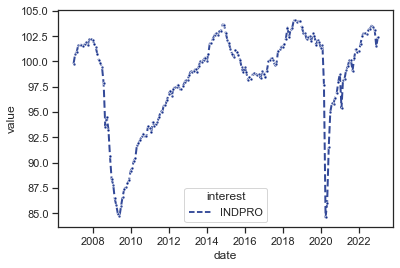

In [10]:
plot_lineplot(ipi)

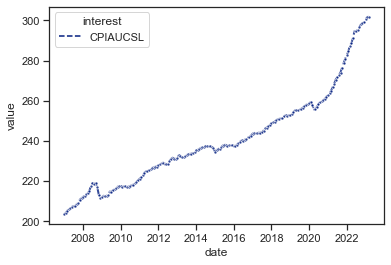

In [11]:
plot_lineplot(cpi)

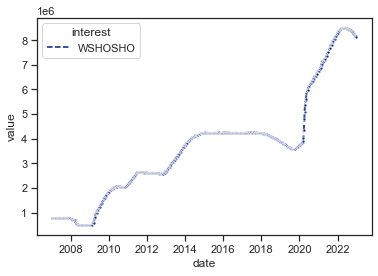

In [12]:
plot_lineplot(sho)

In [20]:
ipi.set_index('date', inplace=True)
cpi.set_index('date', inplace=True)
shadow_rate.set_index('date', inplace=True)
dff.set_index('date', inplace=True)
sho.set_index('date', inplace=True)



# Resample the data to monthly frequency and use the first date of each month
sho = sho.resample('M', loffset=pd.offsets.MonthBegin(1)).mean()


# Resample the data to monthly frequency and calculate the monthly average
dff = dff.resample('M', loffset=pd.offsets.MonthBegin(1)).mean()


monthly_qe = pd.concat([dff, ipi, cpi, sho, shadow_rate], axis=1)


KeyError: "None of ['date'] are in the columns"

In [21]:
monthly_qe

,DFF,INDPRO,CPIAUCSL,WSHOSHO,shadow_rate
date,,,,,
1990-01-01,NaN,NaN,NaN,NaN,7.949798
1990-02-01,NaN,NaN,NaN,NaN,7.797503
1990-03-01,NaN,NaN,NaN,NaN,7.950956
1990-04-01,NaN,NaN,NaN,NaN,8.136329
1990-05-01,NaN,NaN,NaN,NaN,7.772790
...,...,...,...,...,...
2022-11-01,3.080000,103.0719,298.598,8316832.75,NaN
2022-12-01,3.780000,101.4761,298.990,8222611.80,NaN
2023-01-01,4.104194,102.4257,300.536,8162878.50,NaN


In [22]:
#### Sample data for analysis 

#### Month 1 in 2007 to M12 in 2022

# set date range for filtering
start_date = '2007-01-01'
end_date = '2022-02-01'

# filter based on date range
df = monthly_qe[(monthly_qe.index >= start_date) & (monthly_qe.index <= end_date)]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 182 entries, 2007-01-01 to 2022-02-01
Freq: MS
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DFF          181 non-null    float64
 1   INDPRO       182 non-null    float64
 2   CPIAUCSL     182 non-null    float64
 3   WSHOSHO      181 non-null    float64
 4   shadow_rate  182 non-null    float64
dtypes: float64(5)
memory usage: 8.5 KB


In [23]:
df

,DFF,INDPRO,CPIAUCSL,WSHOSHO,shadow_rate
date,,,,,
2007-01-01,NaN,99.7571,203.437,NaN,5.142853
2007-02-01,5.248387,100.7275,204.226,778886.60,5.133778
2007-03-01,5.258929,100.9023,205.288,779365.00,5.175419
2007-04-01,5.256774,101.5874,205.904,780854.00,5.218031
2007-05-01,5.249667,101.6299,206.755,783437.75,5.101846
...,...,...,...,...,...
2021-10-01,0.079333,100.3045,276.522,7881596.20,-1.702101
2021-11-01,0.079032,101.1971,278.711,8000350.50,-1.849795
2021-12-01,0.079667,100.8860,280.887,8145496.50,-1.154819


In [24]:
df[df['DFF'].isna()]


,DFF,INDPRO,CPIAUCSL,WSHOSHO,shadow_rate
date,,,,,
2007-01-01,NaN,99.7571,203.437,NaN,5.142853


In [25]:
cols = ['DFF', 'WSHOSHO']
df.loc[:,cols] = df.loc[:,cols].bfill()

/Users/vanessa/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-25-33295605db59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,cols] = df.loc[:,cols].bfill()


#### The basis behind Vector AutoRegression is that each of the time series in the system influences each other. That is, you can predict the series with past values of itself along with other series in the system.

H(0):
* Null hypothesis is that the coefficients of lagged values in the model are not statistically significant, 
indicating that the past values of one variable do not have a significant effect on the other variable. 

H(a):
* The alternative hypothesis is that the coefficients are significant, suggesting that past values of one variable have a significant effect on the other variable.

In [26]:

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y  be rejected.
    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns) 

,DFF_x,INDPRO_x,CPIAUCSL_x,WSHOSHO_x,shadow_rate_x
DFF_y,1.0000,0.0032,0.0000,0.0082,0.0000
INDPRO_y,0.0044,1.0000,0.0013,0.0002,0.0011
CPIAUCSL_y,0.0000,0.4316,1.0000,0.0003,0.1694
WSHOSHO_y,0.0000,0.0000,0.0019,1.0000,0.0019
shadow_rate_y,0.0124,0.0035,0.0119,0.0000,1.0000


#### Investigating the relationships between the variables over an extended period, it may suggest that there is a long-run relationship between the variables. Lets do an cointegration test to make the time series stationary. Cointegration tests help to determine whether there is a stable long-run relationship between the variables after removing the short-term fluctuations

In [27]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
DFF    ::  73.95     > 60.0627   =>   True
INDPRO ::  39.88     > 40.1749   =>   False
CPIAUCSL ::  21.21     > 24.2761   =>   False
WSHOSHO ::  6.33      > 12.3212   =>   False
shadow_rate ::  0.46      > 4.1296    =>   False


### 4. Data preparation for modelling. Train-test split

#### The VAR model will be fitted on df_train and then used to forecast the next 4 observations. These forecasts will be compared against the actuals present in test data.

In [29]:

obs = 4
df_train, df_test = df[0:-obs], df[-obs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(178, 5)
(4, 5)


In [30]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [31]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n') 

    Augmented Dickey-Fuller Test on "DFF" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.5494
 No. Lags Chosen       = 8
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0002. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "INDPRO" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.9823
 No. Lags Chosen       = 2
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.2944. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CPIAUCSL" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary

#### The ADF test confirms some (DFF and frr) of the time series is stationary. Let’s difference all of them once and check again.

In [32]:
# 1st difference
df_differenced = df_train.diff().dropna()

# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "DFF" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.4515
 No. Lags Chosen       = 7
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.1277. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "INDPRO" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.1748
 No. Lags Chosen       = 1
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CPIAUCSL" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.


In [33]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')
    

    Augmented Dickey-Fuller Test on "DFF" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.6347
 No. Lags Chosen       = 6
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "INDPRO" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.6062
 No. Lags Chosen       = 10
 Critical value 1%     = -3.471
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CPIAUCSL" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 

##### fitting the order of the VAR


In [34]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  14.716276695239552
BIC :  15.25881143362644
FPE :  2461819.168727295
HQIC:  14.936344237163247 

Lag Order = 2
AIC :  14.110652476796712
BIC :  15.109204439192109
FPE :  1344451.5120431713
HQIC:  14.515726516625948 

Lag Order = 3
AIC :  13.854346840637298
BIC :  15.312516364104479
FPE :  1042359.4442069144
HQIC:  14.445917388681158 

Lag Order = 4
AIC :  13.657438816641912
BIC :  15.578874398417568
FPE :  859031.0478853012
HQIC:  14.43701508557413 

Lag Order = 5
AIC :  13.727098906572344
BIC :  16.115498101574367
FPE :  926325.5353491049
HQIC:  14.696209642359165 

Lag Order = 6
AIC :  13.690792661289153
BIC :  16.549903000952625
FPE :  901141.9975941126
HQIC:  14.850986481015216 

Lag Order = 7
AIC :  13.594289210150722
BIC :  16.927909143204882
FPE :  828536.3173414662
HQIC:  14.947134946901611 

Lag Order = 8
AIC :  13.625679674031332
BIC :  17.437659529850784
FPE :  869731.0553744934
HQIC:  15.172766728994949 

Lag Order = 9
AIC :  13.452826897328148
BIC :  1

In [35]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,16.16,16.25,1.041e+07,16.20
1,14.79,15.36,2.660e+06,15.02
2,14.09,15.13*,1.321e+06,14.51
3,13.79,15.30,9.795e+05,14.41
4,13.55,15.54,7.745e+05,14.36*
5,13.56,16.02,7.862e+05,14.56
6,13.47,16.40,7.266e+05,14.66
7,13.37,16.77,6.647e+05,14.75
8,13.43,17.30,7.162e+05,15.00
9,13.24,17.59,6.085e+05,15.01


In [36]:
model_fitted = model.fit(4)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 24, Apr, 2023
Time:                     16:52:28
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    15.5789
Nobs:                     172.000    HQIC:                   14.4370
Log likelihood:          -2289.83    FPE:                    859031.
AIC:                      13.6574    Det(Omega_mle):         482908.
--------------------------------------------------------------------
Results for equation DFF
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                 -0.000964         0.008087           -0.119           0.905
L1.DFF                -0.529583         0.078774           -6.723           0.000
L1.INDPRO              0.006602         0.007091          

#### Check for remaining serial correlation: A common way of checking for serial correlation of errors can be measured using the Durbin Watson’s Statistic. The value of this statistic can vary between 0 and 4. 
#### The closer it is to the value 2, then there is no significant serial correlation. The closer to 0, there is a positive serial correlation, and the closer it is to 4 implies negative serial correlation. 

In [37]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

# for col, val in zip(df.columns, out):
#    print(adjust(col), ':', round(val, 2))
    
for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

DFF : 2.09
INDPRO : 2.05
CPIAUCSL : 1.95
WSHOSHO : 2.01
shadow_rate : 2.02


In [38]:
# Get the lag order (we already know this)
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=obs) # obs defined at top of program
df_forecast = pd.DataFrame(fc, index=df.index[-obs:], columns=df.columns + '_2d')
df_forecast

4


,DFF_2d,INDPRO_2d,CPIAUCSL_2d,WSHOSHO_2d,shadow_rate_2d
date,,,,,
2021-11-01,0.008822,0.307182,-0.776518,-51688.074963,-0.047232
2021-12-01,0.020412,-1.732674,0.051133,-57958.277305,-0.051025
2022-01-01,0.053669,0.205543,0.154203,27896.134685,0.055376
2022-02-01,-0.034346,0.197696,0.113453,18500.494771,0.107453


In [39]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc


df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
#df_results.loc[:, ['DFF', 'INDPRO', 'CPIAUCSL', 'WSHOSHO', 'ffr', 'shadow_rate']]

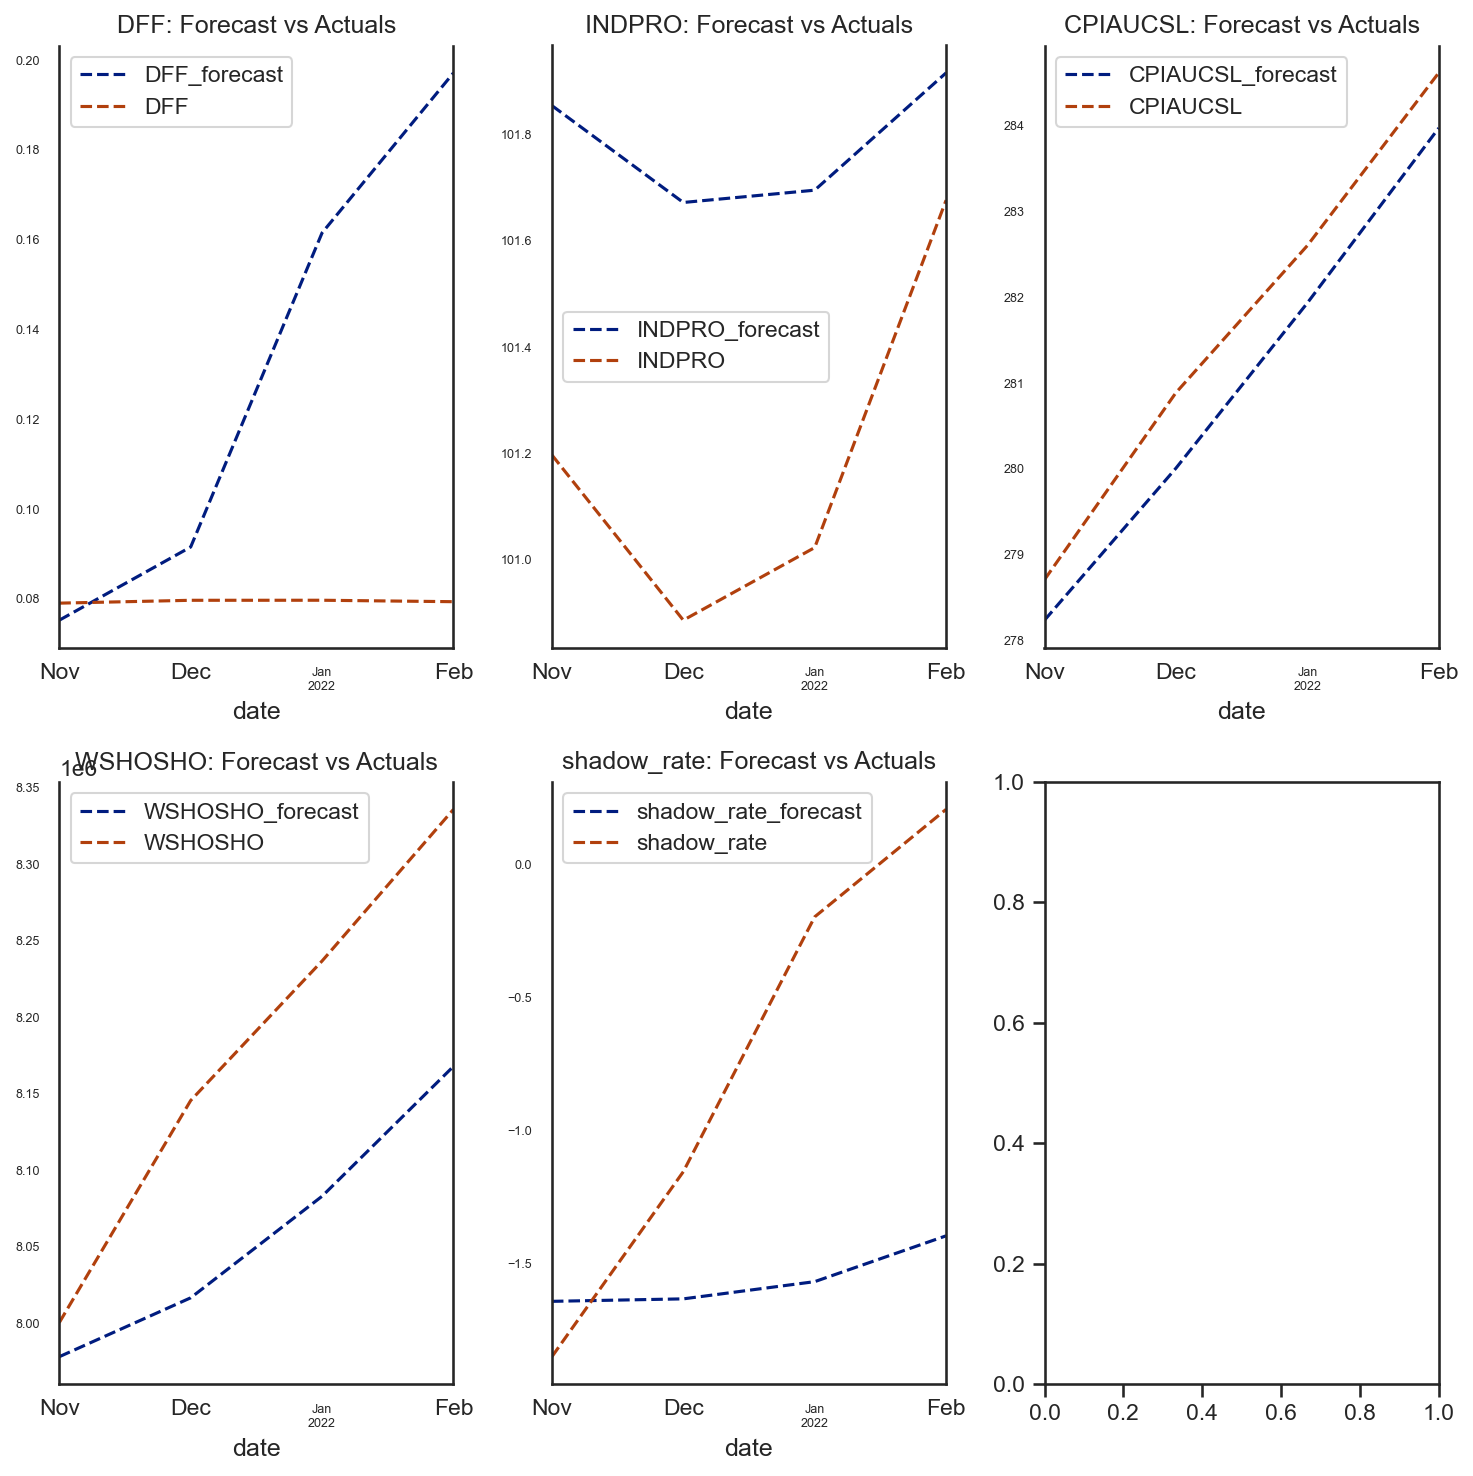

In [40]:
# plot forecasts


fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=3, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-obs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [41]:
df_results.columns

Index(['DFF_2d', 'INDPRO_2d', 'CPIAUCSL_2d', 'WSHOSHO_2d', 'shadow_rate_2d',
       'DFF_1d', 'DFF_forecast', 'INDPRO_1d', 'INDPRO_forecast', 'CPIAUCSL_1d',
       'CPIAUCSL_forecast', 'WSHOSHO_1d', 'WSHOSHO_forecast', 'shadow_rate_1d',
       'shadow_rate_forecast'],
      dtype='object')

In [42]:
#-----------------------------------------
# forecast accuracy
#-----------------------------------------


from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: Effective Federal Fund Rate')
accuracy_prod = forecast_accuracy(df_results['DFF_forecast'].values, df_test['DFF'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: Industrial Production Index')
accuracy_prod = forecast_accuracy(df_results['INDPRO_forecast'].values, df_test['INDPRO'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: Consumer Price Index')
accuracy_prod = forecast_accuracy(df_results['CPIAUCSL_forecast'].values, df_test['CPIAUCSL'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: SHO')
accuracy_prod = forecast_accuracy(df_results['WSHOSHO_forecast'].values, df_test['WSHOSHO'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


print('\nForecast Accuracy of: Shadow Rate')
accuracy_prod = forecast_accuracy(df_results['shadow_rate_forecast'].values, df_test['shadow_rate'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


Forecast Accuracy of: Effective Federal Fund Rate
mape :  0.6772
me :  0.0519
mae :  0.0538
mpe :  0.6531
rmse :  0.072
corr :  0.2912
minmax :  0.3205

Forecast Accuracy of: Industrial Production Index
mape :  0.0058
me :  0.5892
mae :  0.5892
mpe :  0.0058
rmse :  0.6247
corr :  0.919
minmax :  0.0058

Forecast Accuracy of: Consumer Price Index
mape :  0.0024
me :  -0.6653
mae :  0.6653
mpe :  -0.0024
rmse :  0.6809
corr :  0.9979
minmax :  0.0024

Forecast Accuracy of: SHO
mape :  0.0144
me :  -118242.5662
mae :  118242.5662
mpe :  -0.0144
rmse :  131318.5239
corr :  0.9651
minmax :  0.0144

Forecast Accuracy of: Shadow Rate
mape :  3.8076
me :  -0.8105
mae :  0.9145
mpe :  -0.1301
rmse :  1.0858
corr :  0.8556
minmax :  0.0703
